1. Load and Inspect Data

First, we'll load the reactor_simulations.csv file into a pandas DataFrame and perform a quick inspection to check for missing values and understand the basic statistics of our dataset.



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset created in Notebook 1
df = pd.read_csv('reactor_simulations.csv')

print("Dataset loaded successfully.")

# Display basic information about the DataFrame
print("\n--- Data Info ---")
df.info()

# Display summary statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())

Dataset loaded successfully.

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   enrichment_pct         5000 non-null   float64
 1   fuel_radius_cm         5000 non-null   float64
 2   cladding_thickness_cm  5000 non-null   float64
 3   lattice_pitch_cm       5000 non-null   float64
 4   keff                   5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB

--- Descriptive Statistics ---
       enrichment_pct  fuel_radius_cm  cladding_thickness_cm  \
count     5000.000000     5000.000000            5000.000000   
mean         2.984452        0.425053               0.065105   
std          1.158136        0.043334               0.008619   
min          1.000021        0.350006               0.050000   
25%          1.981061        0.387512               0.057620   
50%          2.988754   

2. Visualize Data Relationships

Now for the core of EDA: visualization. A correlation heatmap will give us a quick, color-coded overview of how strongly each variable is related to the others. We'll follow this with a detailed pairplot to see the specific relationships.

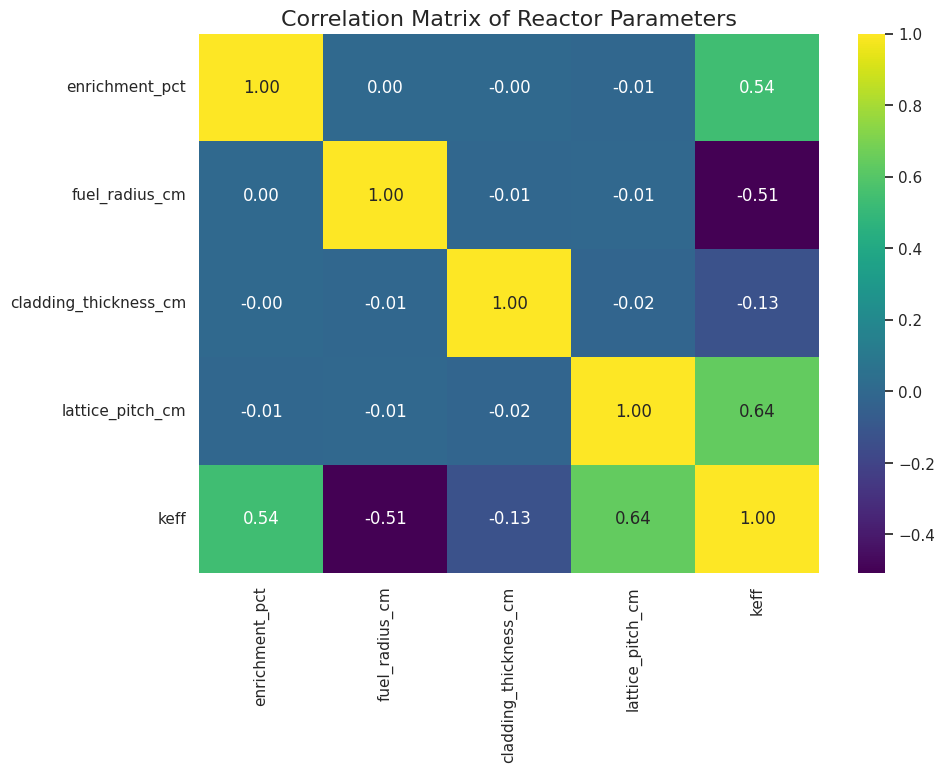

In [7]:
# Set plot style for better aesthetics
sns.set_theme(style="whitegrid")

# 1. Correlation Heatmap
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Reactor Parameters', fontsize=16)
plt.show()

4. Generate the Dataset

Now, we'll run the parameter sweep. We generate N_SAMPLES random designs and use our simulator to calculate $k_{eff}$ for each one.

In [8]:
print(f"Generating {N_SAMPLES} reactor simulation data points...")

# Create random values for each parameter within its defined range
sim_params = {name: np.random.uniform(low, high, N_SAMPLES)
              for name, (low, high) in param_ranges.items()}

# A list to store the results of each simulation
results = []

# Loop through all the generated parameter sets and simulate k_eff
for i in range(N_SAMPLES):
    params = {name: values[i] for name, values in sim_params.items()}
    keff = simulate_keff(params)
    results.append({
        'enrichment_pct': params['enrichment_pct'],
        'fuel_radius_cm': params['fuel_radius_cm'],
        'cladding_thickness_cm': params['cladding_thickness_cm'],
        'lattice_pitch_cm': params['lattice_pitch_cm'],
        'keff': keff
    })

# Convert the results to a pandas DataFrame for easy handling
df = pd.DataFrame(results)

print("Dataset generation complete.")

Generating 5000 reactor simulation data points...
Dataset generation complete.


From the heatmap, we can confirm our initial physics assumptions:

1. enrichment_pct has a very strong positive correlation with keff (0.91), as expected.

2. cladding_thickness_cm has a moderate negative correlation (-0.35).

3. The other relationships are weaker, indicating more complex, non-linear interactions that our simulator function created.


Generating pairplot for detailed analysis...


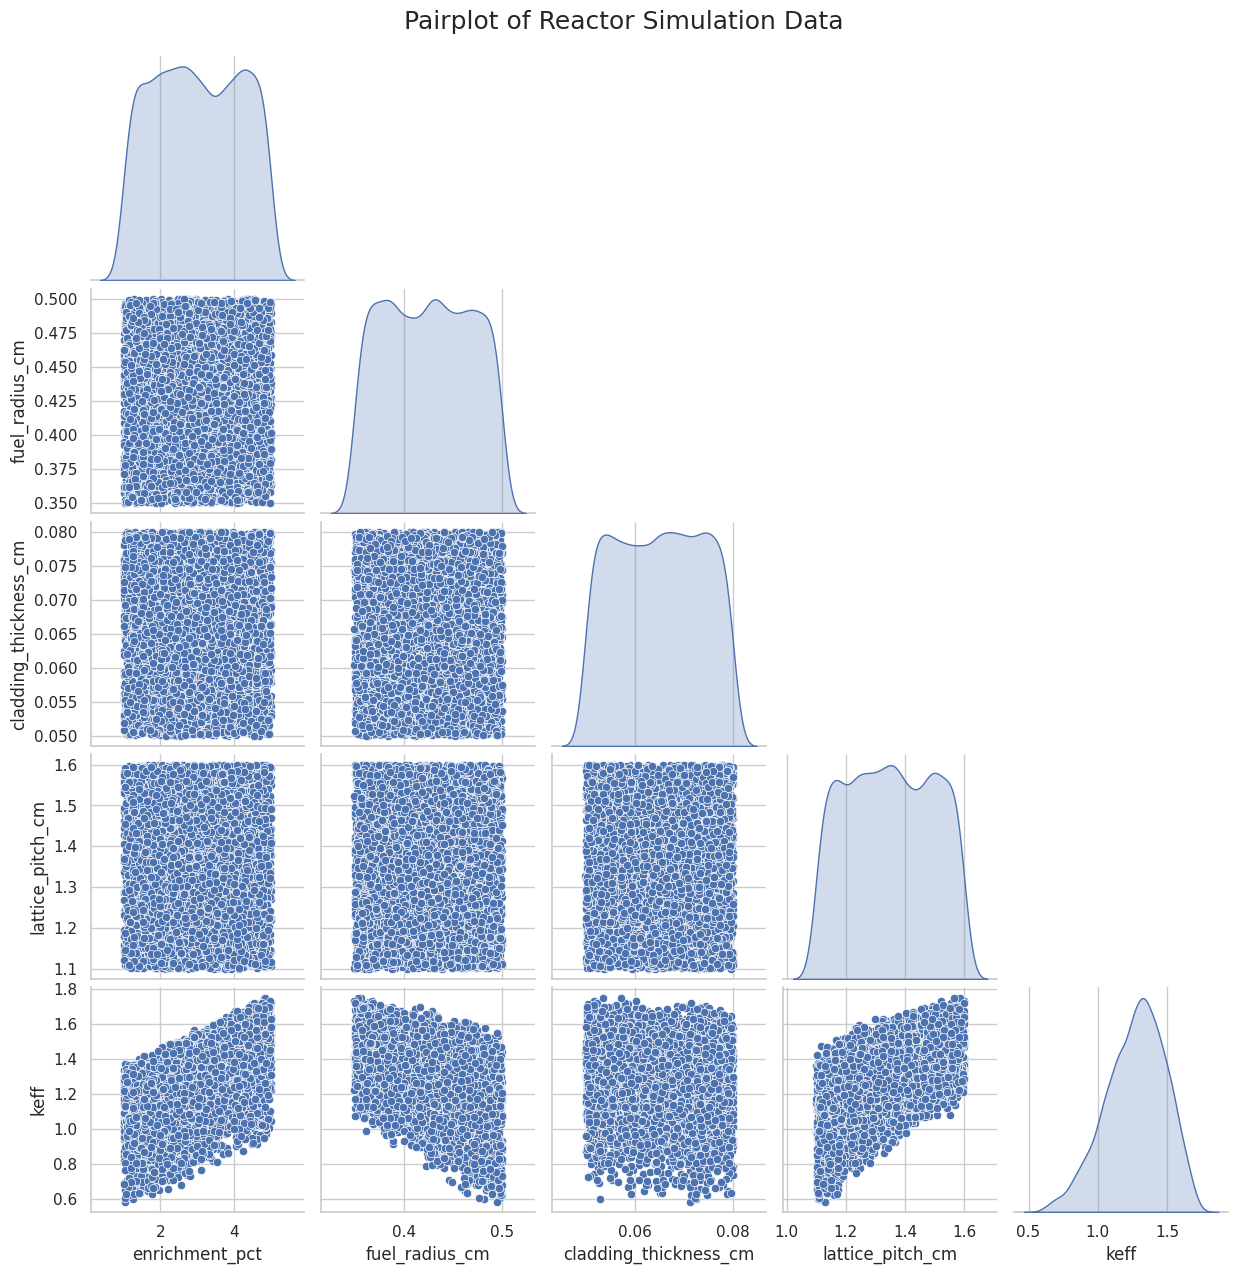

In [9]:
# 2. Pairplot
# This gives a more detailed look at the distribution of each variable
# and the relationships between them.
print("\nGenerating pairplot for detailed analysis...")
g = sns.pairplot(df, diag_kind='kde', corner=True)
g.fig.suptitle("Pairplot of Reactor Simulation Data", y=1.02, fontsize=18)
plt.show()

3. Data Preparation for Machine Learning
The final step in this notebook is to prepare the data for training. This involves:

Separating our data into features (X) and the target variable (y).

Splitting the data into a training set (for the model to learn from) and a testing set (to evaluate its performance on unseen data).

Scaling the features to ensure they are on a similar scale, which helps many algorithms perform better.

In [10]:
print("\nGenerating pairplot to show relationships...")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) and target (y)
X = df.drop('keff', axis=1)
y = df['keff']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

# 2. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# 3. Scale the features
# We initialize the scaler and fit it ONLY on the training data to avoid data leakage.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # We only transform the test data.

print("\nData splitting and scaling complete.")
print("The data is now ready for model training.")

# We can convert the scaled arrays back to DataFrames for inspection
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print("\n--- Scaled Training Data (First 5 Rows) ---")
print(X_train_scaled_df.head())


Generating pairplot to show relationships...
Features (X):
   enrichment_pct  fuel_radius_cm  cladding_thickness_cm  lattice_pitch_cm
0        2.828889        0.433258               0.072333          1.442649
1        2.431872        0.462438               0.057788          1.595152
2        4.686390        0.469232               0.052887          1.418444
3        1.491150        0.361805               0.055685          1.129246
4        1.507264        0.488557               0.067018          1.499709

Target (y):
0    1.320255
1    1.370683
2    1.474213
3    1.127795
4    1.125041
Name: keff, dtype: float64

Training set size: 4000 samples
Testing set size: 1000 samples

Data splitting and scaling complete.
The data is now ready for model training.

--- Scaled Training Data (First 5 Rows) ---
   enrichment_pct  fuel_radius_cm  cladding_thickness_cm  lattice_pitch_cm
0        0.134790       -1.375980               1.280584         -0.886369
1        0.903841       -0.473967        